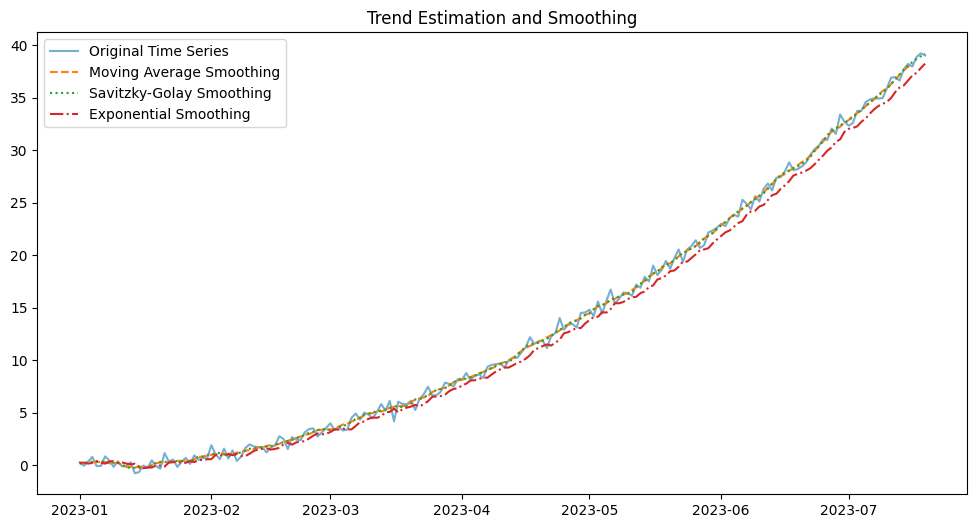

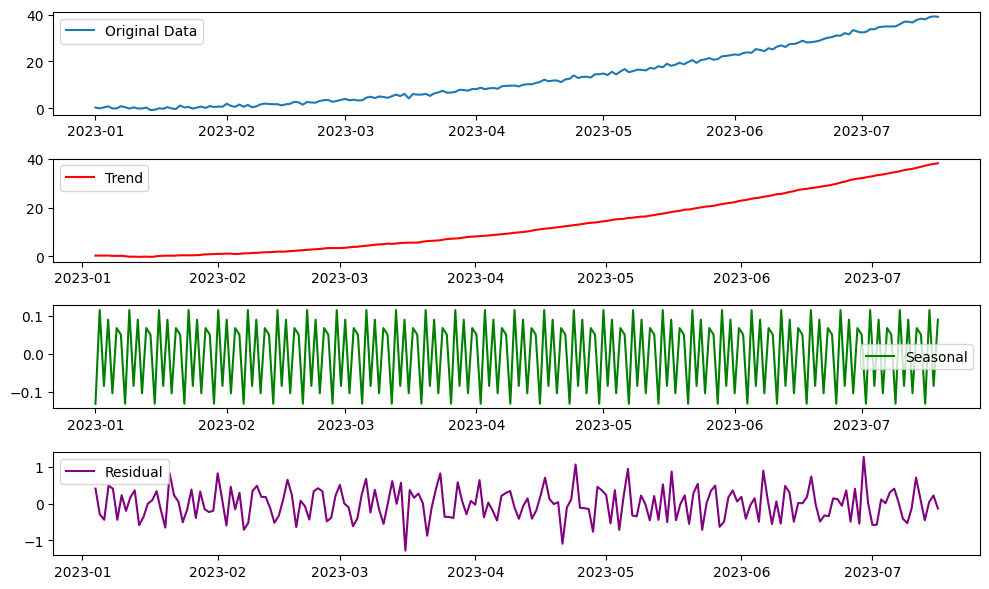

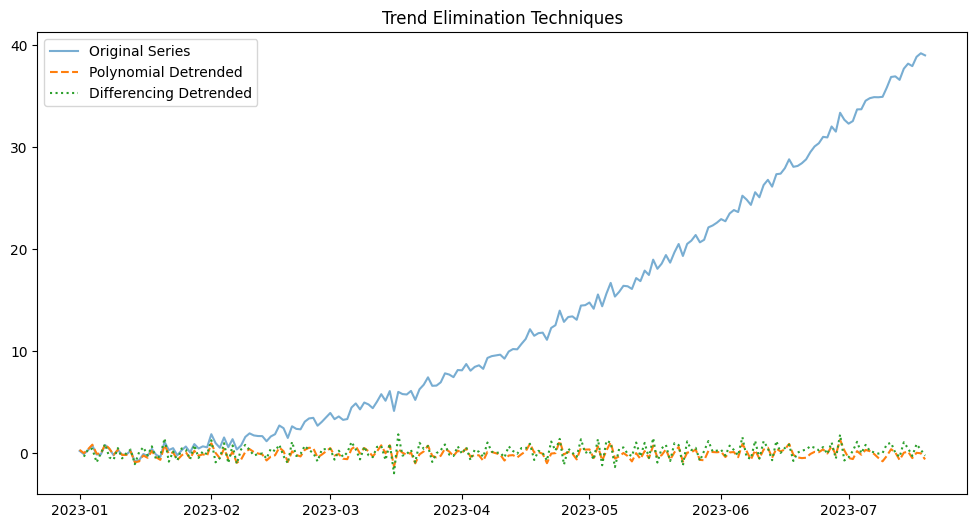

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def generate_synthetic_data(n=100, trend_type='linear', noise_level=0.5):
    np.random.seed(42)
    time = np.arange(n)
    if trend_type == 'linear':
        trend = 0.05 * time
    elif trend_type == 'quadratic':
        trend = 0.001 * time**2
    elif trend_type == 'logarithmic':
        trend = np.log1p(time)
    noise = noise_level * np.random.randn(n)
    return pd.Series(trend + noise, index=pd.date_range(start='2023-01-01', periods=n, freq='D'))

def moving_average_smoothing(series, window=7):
    return series.rolling(window=window, center=True).mean()

def savitzky_golay_smoothing(series, window=11, poly_order=2):
    return pd.Series(savgol_filter(series, window_length=window, polyorder=poly_order), index=series.index)

def simple_exponential_smoothing(series, alpha=0.3):
    model = SimpleExpSmoothing(series, initialization_method='estimated')
    fit = model.fit(smoothing_level=alpha)
    return fit.fittedvalues

def difference_detrending(series, lag=1):
    return series.diff(lag).dropna()

def polynomial_detrending(series, degree=2):
    x = np.arange(len(series))
    coeffs = np.polyfit(x, series, degree)
    trend = np.polyval(coeffs, x)
    return series - trend

def decompose_and_plot(series, model='additive'):
    decomposition = seasonal_decompose(series, model=model, period=7)
    plt.figure(figsize=(10,6))
    plt.subplot(4,1,1)
    plt.plot(series, label='Original Data')
    plt.legend()
    plt.subplot(4,1,2)
    plt.plot(decomposition.trend, label='Trend', color='red')
    plt.legend()
    plt.subplot(4,1,3)
    plt.plot(decomposition.seasonal, label='Seasonal', color='green')
    plt.legend()
    plt.subplot(4,1,4)
    plt.plot(decomposition.resid, label='Residual', color='purple')
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    series = generate_synthetic_data(n=200, trend_type='quadratic')
    
    plt.figure(figsize=(12,6))
    plt.plot(series, label='Original Time Series', alpha=0.6)
    plt.plot(moving_average_smoothing(series), label='Moving Average Smoothing', linestyle='dashed')
    plt.plot(savitzky_golay_smoothing(series), label='Savitzky-Golay Smoothing', linestyle='dotted')
    plt.plot(simple_exponential_smoothing(series), label='Exponential Smoothing', linestyle='dashdot')
    plt.legend()
    plt.title('Trend Estimation and Smoothing')
    plt.show()
    
    decompose_and_plot(series)
    
    plt.figure(figsize=(12,6))
    plt.plot(series, label='Original Series', alpha=0.6)
    plt.plot(polynomial_detrending(series), label='Polynomial Detrended', linestyle='dashed')
    plt.plot(difference_detrending(series), label='Differencing Detrended', linestyle='dotted')
    plt.legend()
    plt.title('Trend Elimination Techniques')
    plt.show()
    
if __name__ == "__main__":
    main()
